In [ ]:
import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

In [ ]:
import os
import cv2

dirname = "/gdrive/My Drive/Мои Курсы/Старт в ML: создайте свою систему распознавания лиц/Start_ML"
labels = ['Уткин Андрей','Aleksandr V', 'adam sendler', 'Arsen_A']

X, y = [], []

for label in labels:
    
    subdir = os.path.join(dirname, label)
    filelist = os.listdir(subdir)
    
    for fname in filelist:
        img = cv2.imread(os.path.join(subdir, fname), cv2.IMREAD_GRAYSCALE)
        
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        
        X.append(img)
        y.append(label)
len(X), len(y)

(205, 205)

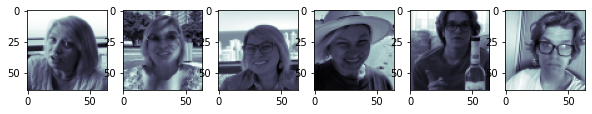

In [ ]:
from matplotlib import pylab as plt

fig, axx = plt.subplots(1, 6, figsize=(10, 5))

for i in range(6):
    img = X[16*i]
    axx[i].imshow(img, cmap='bone') 

Домашка 2.2 применить BaseLine

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
labels = {'Aleksandr V' : 1, 'Уткин Андрей' : 0, 'adam sendler' : 2, 'Arsen_A' : 3}

y = [labels[item] for item in y]

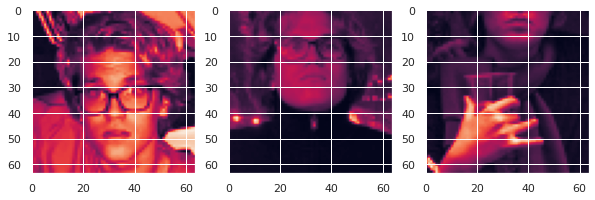

In [ ]:
fig, axx = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img = X[i]
    axx[i].imshow(img)

In [ ]:
data = np.asarray([el.ravel() for el in X])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, stratify = y, random_state=41)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
pred_lr = model_lr.predict(Xtest)
print(len(pred_lr))
accuracy_score(ytest, pred_lr)

52


0.8461538461538461

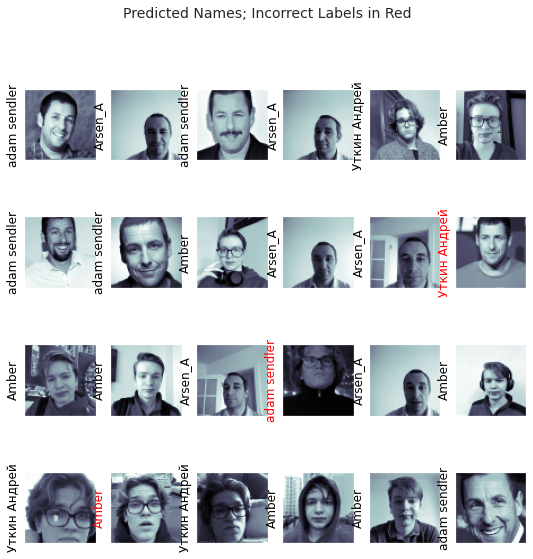

In [ ]:
labels = {1 : 'Amber', 0 : 'Уткин Андрей', 2 : 'adam sendler', 3 : 'Arsen_A'}
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(labels[pred_lr[i]],
                   color='black' if pred_lr[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);